# Decision tree (決策樹)

A **decision tree** is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. --- [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree)

**Decision tree learning** uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modelling approaches used in statistics, data mining and machine learning. --- [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)

## An example

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png">
A tree showing survival of passengers on the Titanic ("sibsp" is the number of spouses or siblings aboard). The figures under the leaves show the probability of survival and the percentage of observations in the leaf. Summarizing: Your chances of survival were good if you were (i) a female or (ii) a young boy without several family members. (CC BY-SA 3.0, Stephen Milborrow )

# Decision trees to predict house prices

## A scenario

Today's class will have you build models for the following scenario:

Your cousin has made millions of dollars speculating on real estate. He's offered to become business partners with you because of your interest in data science. He'll supply the money, and you'll supply models that predict how much various houses are worth.

*Today's class was adpated from Kaggle's [Learn Machine Learning](https://www.kaggle.com/learn/machine-learning) series.*

## A sample decision tree

For simplicity, we'll start with the simplest possible decision tree: ![First Decision Trees](http://i.imgur.com/7tsb5b1.png)

It divides houses into only two categories. You predict the price of a new house by finding out which category it's in, and the prediction is the historical average price from that category.

This captures the relationship between house size and price. We use data to decide how to break the houses into two groups,  and then again to determine the predicted price in each group.  This step of capturing patterns from data is called **fitting** or **training** the model. The data used to **fit** the model is called the **training data**.  

After the model has been fit, you can apply it to new data to **predict** prices of additional homes.

## How to improve

The sample decision tree probably makes sense, because it captures the reality that houses with more bedrooms tend to sell at higher prices than houses with fewer bedrooms.  The biggest shortcoming of this model is that it doesn't capture most factors affecting home price, like number of bathrooms, lot size, location, etc. 

You can capture more factors using a tree that has more "splits." These are called "deeper" trees. A decision tree that also considers the total size of each house's lot might look like this: 
![Depth 2 Tree](http://i.imgur.com/R3ywQsR.png)

You predict the price of any house by tracing through the decision tree, always picking the path corresponding to that house's characteristics. The predicted price for the house is at the bottom of the tree.  The point at the bottom where we make a prediction is called a **leaf.**   

The splits and values at the leaves will be determined by the data, so it's time for you to check out the data you will be working with.

## The data set

You will build a model to predict home prices in [Melbourne](https://en.wikipedia.org/wiki/Melbourne), Australia.

The data set (`melb_data.csv`) was scraped from publicly available results posted every week from Domain.com.au (by Tony Pino). Check [kaggle.com](https://www.kaggle.com/anthonypino/melbourne-housing-market) for more information.

<img src="https://i1.wp.com/lattitude.org.uk/wp-content/uploads/2017/07/image.adapt_.1663.medium.jpg" width="800">

## Using Pandas to Get Familiar With Your Data

The first thing you'll want to do is familiarize yourself with the data. As usual, we'll use the Pandas library for this.

In [1]:
import pandas as pd

In [2]:
# save filepath to variable for easier access
melbourne_file_path = 'melb_data.csv'

# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path, index_col=0)

# drop missing values
melbourne_data.dropna(inplace=True)

# peek at the first 5 records
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [3]:
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


The results show 8 numbers for each column in your original dataset. The first number, the **count**, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house.

The second value is the **mean**, which is the _average_. Under that, **std** is the _standard deviation_, which measures how numerically spread out the values are.

To interpret the **min**, **25%**, **50%**, **75%** and **max** values, imagine sorting each column from lowest to highest value. The first (smallest) value is the **min**. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analgously, and the max is the largest number.

## Choosing the Prediction Target

We are ready to choose which column you want to predict. This column is called the **prediction target** (**target variable**). There is a convention that the prediction target is referred to as y. Here is an example doing that with the example data.

In [16]:
y = melbourne_data.Price

## Choosing Predictors

Next we select the predictors. In this example data, the **predictors** will be chosen as:

In [17]:
melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']

By convention, this data is called **X**.

In [18]:
X = melbourne_data[melbourne_predictors]

## Building Your Model

As usual, we will use the **scikit-learn** library to create your models.

The steps to building and using a model are:

* **Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
* **Fit**: Capture patterns from provided data. This is the heart of modeling.
* **Predict**: Just what it sounds like
* **Evaluate**: Determine how accurate the model's predictions are.

Here is the example for defining and fitting the model.

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Let's see if our model predicts the first 5 house prices:

In [20]:
print("Making predictions for the following 5 houses:")
print(X.head())

print("\nThe real prices are")
print(y.head())

print("\nThe predictions are")
melbourne_model.predict(X.head())

Making predictions for the following 5 houses:
    Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude
2       2       1.0     156.0          79.0     1900.0   -37.8079    144.9934
4       3       2.0     134.0         150.0     1900.0   -37.8093    144.9944
6       4       1.0     120.0         142.0     2014.0   -37.8072    144.9941
11      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993
14      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954

The real prices are
2     1035000.0
4     1465000.0
6     1600000.0
11    1876000.0
14    1636000.0
Name: Price, dtype: float64

The predictions are


array([1035000., 1465000., 1600000., 1876000., 1636000.])

### Predicted vs. Actual Sales Price

Report the coefficient of determination $R^2$ of the prediction:

In [30]:
melbourne_model.score(X, y)

0.9999039524703651

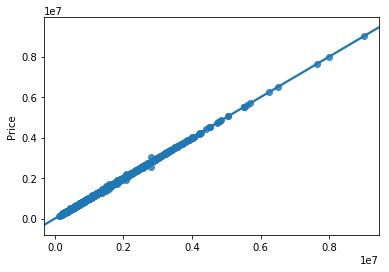

In [22]:
%matplotlib inline
import seaborn as sns

ax = sns.regplot(melbourne_model.predict(X), y)

## Visualizing your decision tree

We can export the tree in [Graphviz](http://www.graphviz.org/) format using the `export_graphviz` exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with

`conda install python-graphviz`

(If you see permission errors, try Start -> Anaconda Prompt -> Right Click -> Execute with Administrator permission)

Alternatively binaries for graphviz can be downloaded from the graphviz project [homepage](http://www.graphviz.org/).

### Installing python-graphviz

In [35]:
try:
    import graphviz
except ModuleNotFoundError:
    !conda install python-graphviz

### Rendering your tree

Here we render the tree using graphviz. Note that we specify the max depth to show because it is a extremely huge tree. Nodes are colored by their value for regression.

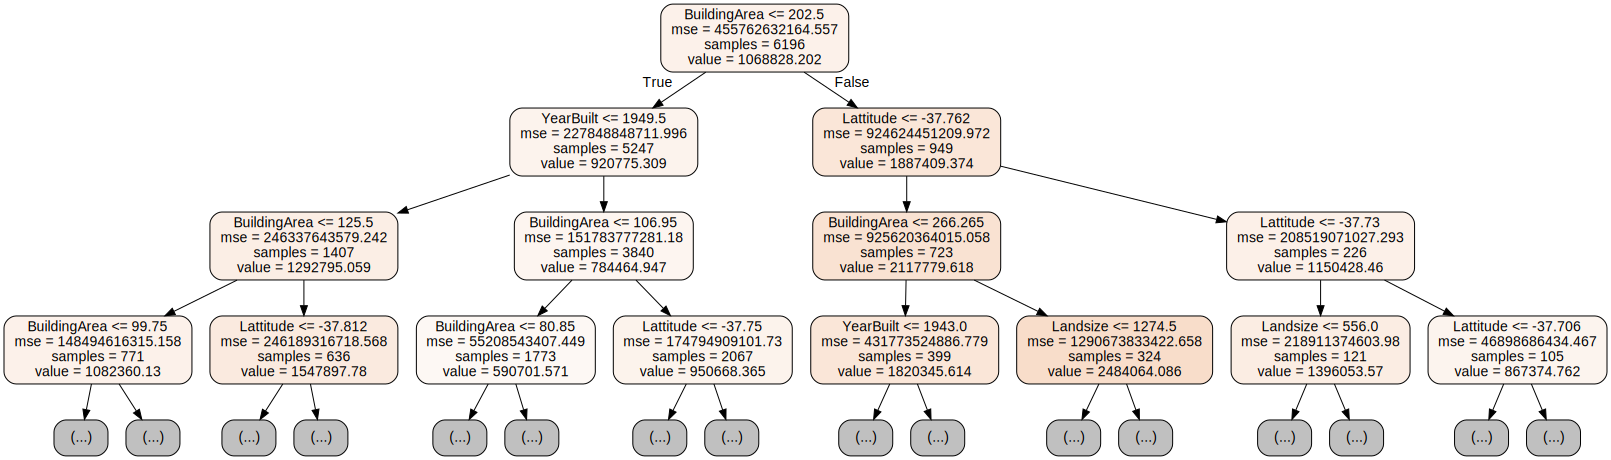

In [36]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(melbourne_model, max_depth=3, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render('my_tree')  # saved in an output file my_tree.pdf
graph  # shown inline

### Evaluating Feature Significance

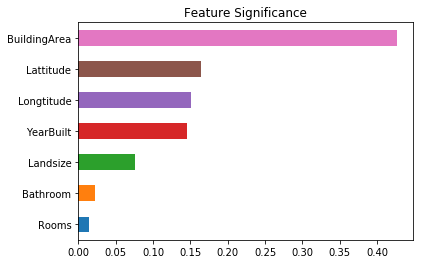

In [12]:
%matplotlib inline

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(melbourne_model.feature_importances_, index=X.columns).sort_values(ascending=True)
coef.plot(kind='barh', title='Feature Significance')

# Exercise

Perform the same analysis on Boston House Prices dataset (see below).

  * Report the coefficient of determination.
  * Report the top 3 most significant features in your model.
  * Export your decision tree (set max depth to 3) to an image file.

In [38]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

X = pd.DataFrame(boston.data, columns=boston.feature_names)  # features
y = pd.Series(boston.target)  # target variable (the prices)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      